In [1]:
from os import path
from numpy import load
import numpy as np

from matplotlib import pyplot as plt
import numpy as np
from scipy.cluster.vq import vq, kmeans2
from scipy.spatial.distance import cdist

# fe_test = data["array2"][1]
# m = 4
# D = len(fe_test)
# assert D % m == 0
# # length of each subvector will be D / m (D* in notation)
# D_ = int(D / m)



In [2]:


def train(vec, M, Ks=256):
    Ds = int(vec.shape[1] / M)
    codeword = np.empty((M, Ks, Ds), np.float32)

    for m in range(M):
        vec_sub = vec[:, m * Ds: (m + 1) * Ds]
        codeword[m], _ = kmeans2(vec_sub, Ks)

    return codeword


def encode(codeword, vec):
    M, Ks, Ds = codeword.shape

    pqcode = np.empty((vec.shape[0], M), np.uint8)

    for m in range(M):
        vec_sub = vec[:, m * Ds: (m + 1) * Ds]
        pqcode[:, m], _ = vq(vec_sub, codeword[m])

    return pqcode


def search(codeword, pqcode, query):
    M, Ks, Ds = codeword.shape

    dist_table = np.empty((M, Ks), np.float32)

    for m in range(M):
        query_sub = query[m * Ds: (m + 1) * Ds]
        dist_table[m, :] = cdist([query_sub], codeword[m], 'sqeuclidean')[0]

    dist = np.sum(dist_table[range(M), pqcode], axis=1)

    return dist




In [12]:

N, Nt, D = 10000, 2000, 128
# 10,000 128-dim vectors to be indexed

data = load('D:/AI Insight Course/Project/Project Image Retrieval/static/feature/all_feartures.npz')
vectors_feature = data["array2"]
path_images = data["array1"]
D = vectors_feature.shape[1]
N = vectors_feature.shape[0]
# vec = np.random.random((N, D)).astype(np.float32)
# vec_train = np.random.random((Nt, D)).astype(
#     np.float32)  # 2,000 128-dim vectors for training
query =  vectors_feature[1]  # a 128-dim query vector

M = 8
codeword = train(vectors_feature, M)
pqcode = encode(codeword, vectors_feature)
dist = search(codeword, pqcode, query)
print(dist)
print(path_images[1000])
path = []
mind_ids = dist.argsort()[:10]



plt.show()
data.close()

[1865.7517 1168.5134 1328.5726 ... 2238.1404 2350.495  2175.581 ]
static/img/animal_bird/0.8891424693491797.jpg


In [15]:
print(path_images[1])

static/img/animal_Alligator/0.02325785296769156.jpg


In [13]:
mind_ids = dist.argsort()[:10]

print(mind_ids)
# for id_ in mind_ids:
#     print("Id: {} -> Dist: {}".format(id_, dist[id_]))
#     img = plt.imread(path_images[id_])
#     plt.imshow(img)


[  1  56  82  97  14 106  10  91  20  66]


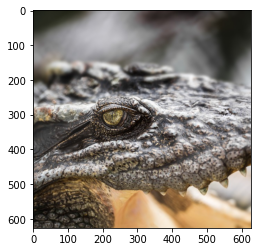

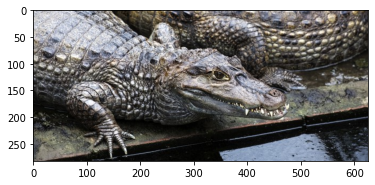

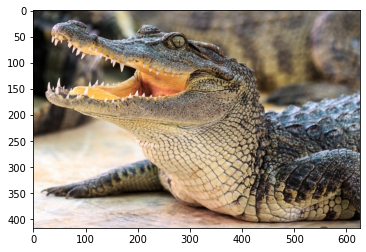

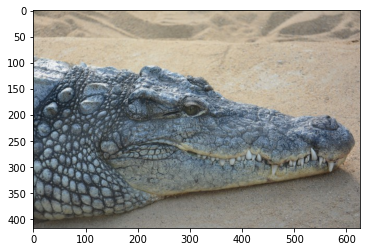

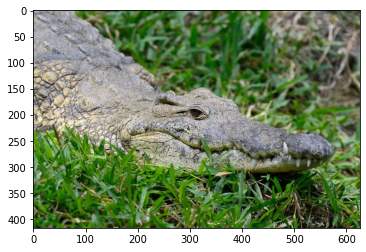

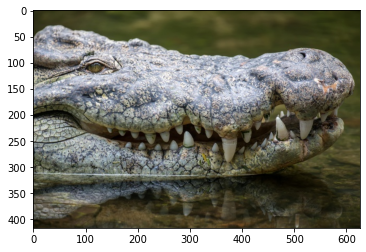

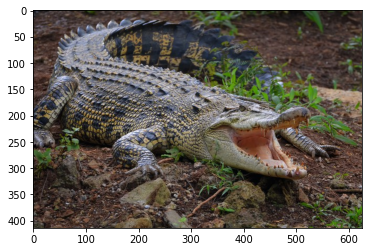

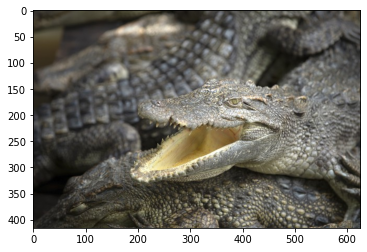

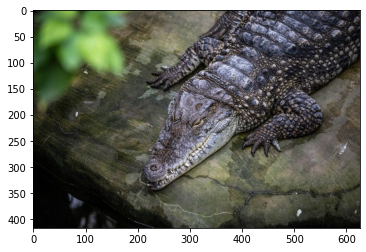

In [14]:
img0 = plt.imread(path_images[mind_ids[0]])
plt.imshow(img0)
plt.show()
img2 = plt.imread(path_images[mind_ids[2]])
plt.imshow(img2)
plt.show()
img3 = plt.imread(path_images[mind_ids[3]])
plt.imshow(img3)
plt.show()
img4 = plt.imread(path_images[mind_ids[4]])
plt.imshow(img4)
plt.show()
img5 = plt.imread(path_images[mind_ids[5]])
plt.imshow(img5)
plt.show()

img6 = plt.imread(path_images[mind_ids[6]])
plt.imshow(img6)
plt.show()

img7 = plt.imread(path_images[mind_ids[7]])
plt.imshow(img7)
plt.show()

img8 = plt.imread(path_images[mind_ids[8]])
plt.imshow(img8)
plt.show()

img9 = plt.imread(path_images[mind_ids[9]])
plt.imshow(img9)
plt.show()

